## Visualizing Geographic Data using Basemap
The dataset was originated from https://openflights.org/data.html. We'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. Here is a breakdown of the 4 files I'll be working with:
- airlines.csv : data on each airline
- airports.csv : data on each airport
- routes.csv : data on each flight route
- geo-routes.csv : data on each geographical point
In this project, I explored which destination airport is the most common and which cities are the most important hubs for airports and airlines.

In [2]:
import pandas as pd
airlines=pd.read_csv("data/airlines.csv")
airports = pd.read_csv("data/airports.csv")
routes = pd.read_csv("data/routes.csv")
print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


To plot the values on a two-dimensional plane, we need to convert the coordinates to the Cartesian coordinate system using a map projection.

C:\Users\TL\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\TL\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


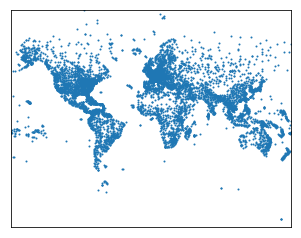

In [5]:
import matplotlib.pyplot as plt #Create a new basemap instance with the specific map projection we want to use
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
#Creating a new basemap instance with these paramenters

longitudes = airports['longitude'].tolist() #Convert the longitude values from spherical to Cartesian from airports.csv
latitudes = airports['latitude'].tolist() #Convert the latitute values from spherical to Cartesian from airports.csv
x,y=m(longitudes, latitudes)
m.scatter(x,y,s=1)
plt.show()

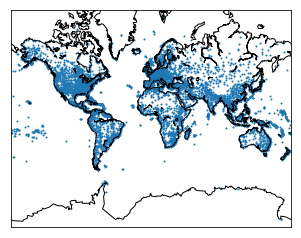

In [7]:
#Add outlines of the coasts for each continent for graphic above
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

## Customize the map graph using matplotlib
To modify the appearance of the map


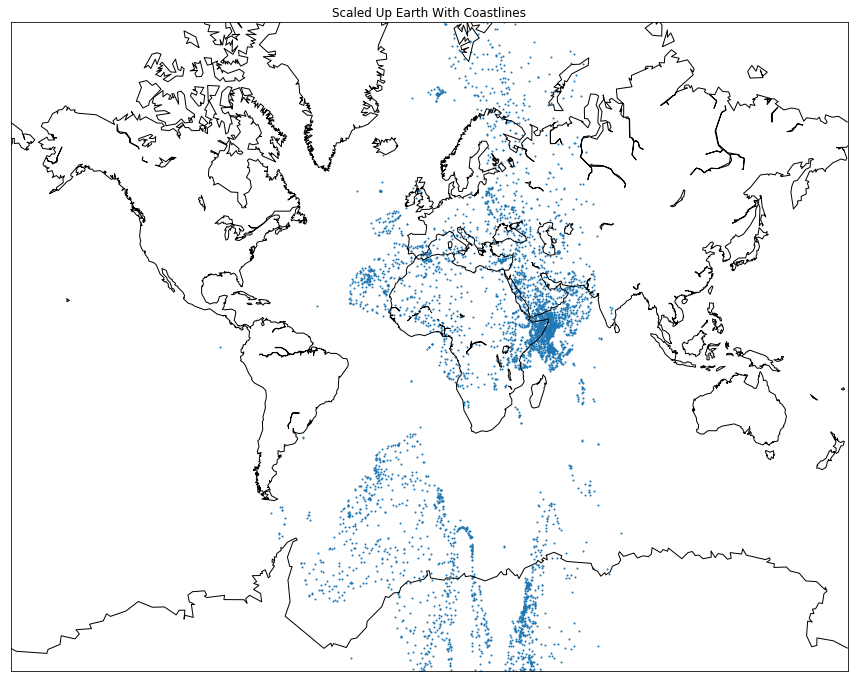

In [8]:
fig, ax = plt.subplots(figsize=(15, 20))
plt.title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes=airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x, y = m(latitudes, longitudes)
m.scatter(x,y,s=1)
m.drawcoastlines()
plt.show()

To better understand the flight routes, I can draw great circles to connect starting and ending locations on a map using the data from geo_routes.csv. A great circle is the shortest circle connecting 2 points on a sphere.

In [10]:
geo_routes=pd.read_csv("data/geo_routes.csv")
geo_routes.info()
print(geo_routes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


We use the basemap.drawgreatcircle() method to display a great circle between 2 points. The basemap.drawgreatcircle() method requires four parameters in the following order:

- lon1 - longitude of the starting point.
- lat1 - latitude of the starting point.
- lon2 - longitude of the ending point.
- lat2 - latitude of the ending point.

C:\Users\TL\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\TL\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


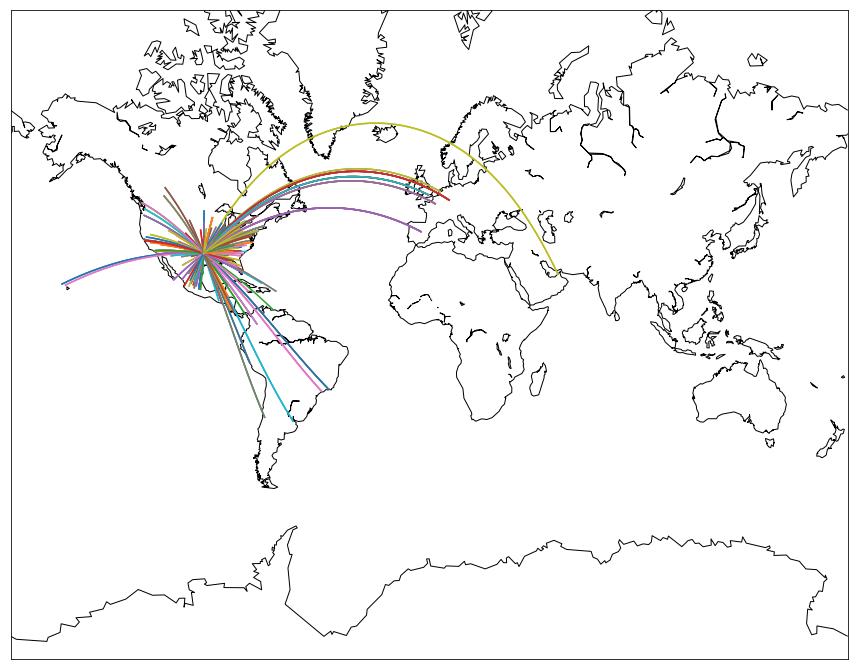

In [12]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for idx, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        if abs(end_lat-start_lat) < 180:
            if abs(end_lon-start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
dfw = geo_routes[geo_routes['source'] == "DFW"]
create_great_circles(dfw)
plt.show()